In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading the whales
whale_returns_csv = Path("whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [3]:
# Cleaning the whales
whale_returns.sort_index(ascending = True, inplace = True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Counting the nulls
print(whale_returns.isnull().sum())
print(whale_returns[whale_returns.isnull().any(axis =1)])

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64
            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  


In [5]:
# Dropping the nulls
whale_returns.dropna(inplace=True)
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [6]:
# Reading Algo's Performance
algo_returns_csv = Path("algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_returns.sort_index(ascending = True, inplace = True)
algo_returns.head(100)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2014-10-10,-0.012612,-0.011752
2014-10-13,-0.018528,-0.002009
2014-10-14,0.000702,0.004501


In [7]:
# Counting the nulls in Algo's Trading Data
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Dropping the nulls from Algo
algo_returns.dropna(inplace = True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [9]:
# Reading S&P 500 Closing Prices, sorting index
sp500_history_csv = Path("sp500_history.csv")
sp500_history = pd.read_csv(sp500_history_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_history.sort_index(ascending=True, inplace=True)
sp500_history.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [10]:
# Check Data Types
sp500_history.dtypes

Close    object
dtype: object

In [11]:
# Fix Data 
sp500_history["Close"]=sp500_history["Close"].str.replace('$', '').astype("float")
sp500_history.sort_index(inplace=True)
sp500_history

<ipython-input-11-132c902add9d>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp500_history["Close"]=sp500_history["Close"].str.replace('$', '').astype("float")


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [12]:
# Calculate Daily Returns
sp500_daily_returns = sp500_history.pct_change()

In [13]:
# Drop the nulls
sp500_daily_returns.dropna(inplace = True)
sp500_daily_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [14]:
# Rename the column
sp500_daily_returns.rename(columns = {"Close": "sp500"}, inplace = True)

In [15]:
# Concatenate all dataframes into one dataframe
df_daily = pd.concat([whale_returns, algo_returns, sp500_daily_returns], axis = "columns", join = "inner")

<AxesSubplot:xlabel='Date'>

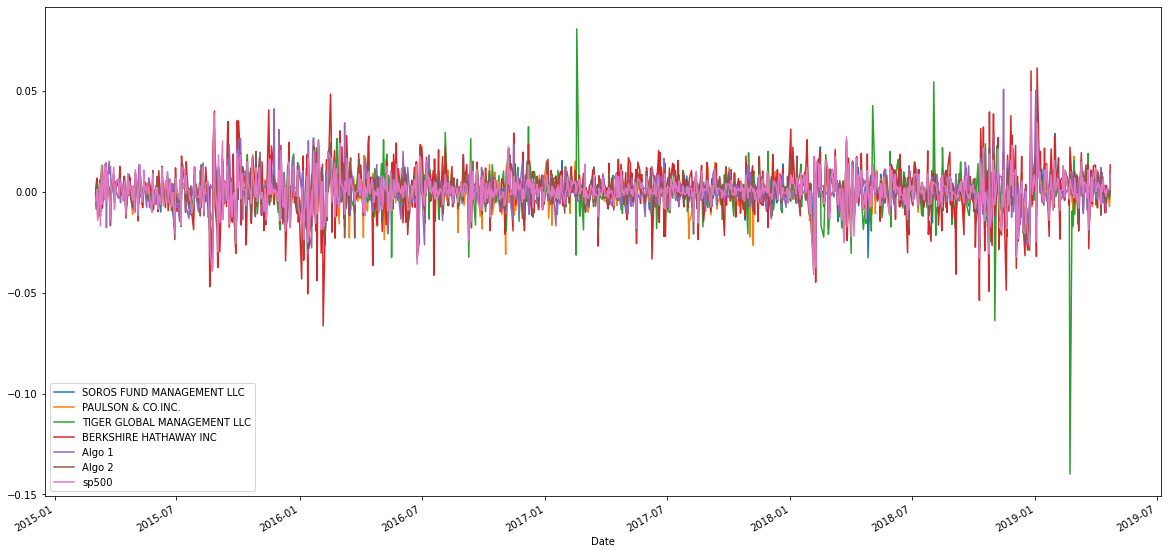

In [16]:
# Plot daily returns
df_daily.plot(figsize = (20,10))

<AxesSubplot:xlabel='Date'>

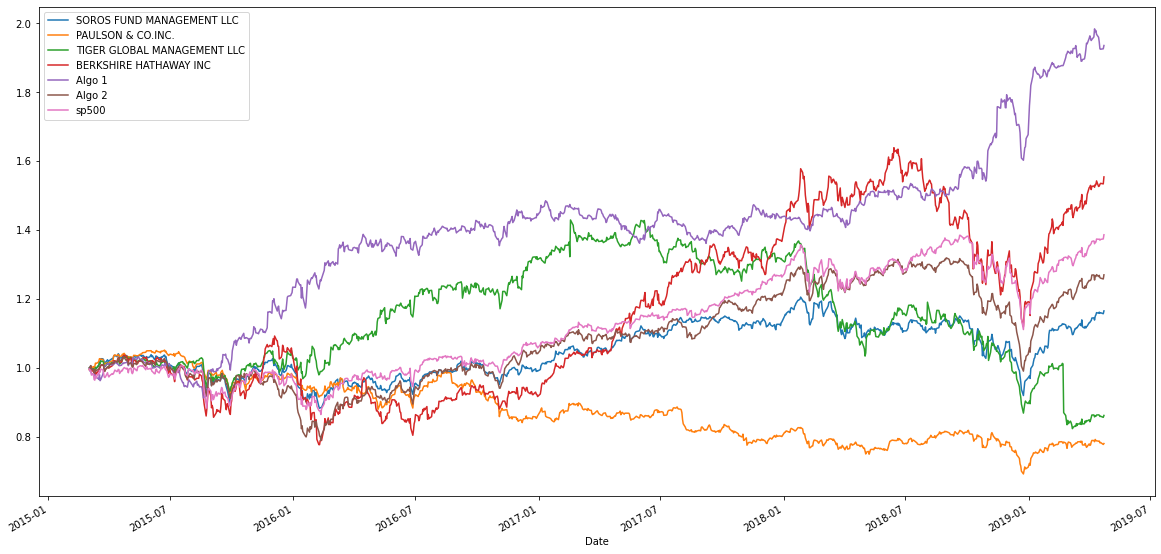

In [17]:
# Plot cumulative returns
df_cum = (1 + df_daily).cumprod()
df_cum.plot(figsize = (20, 10))

<AxesSubplot:>

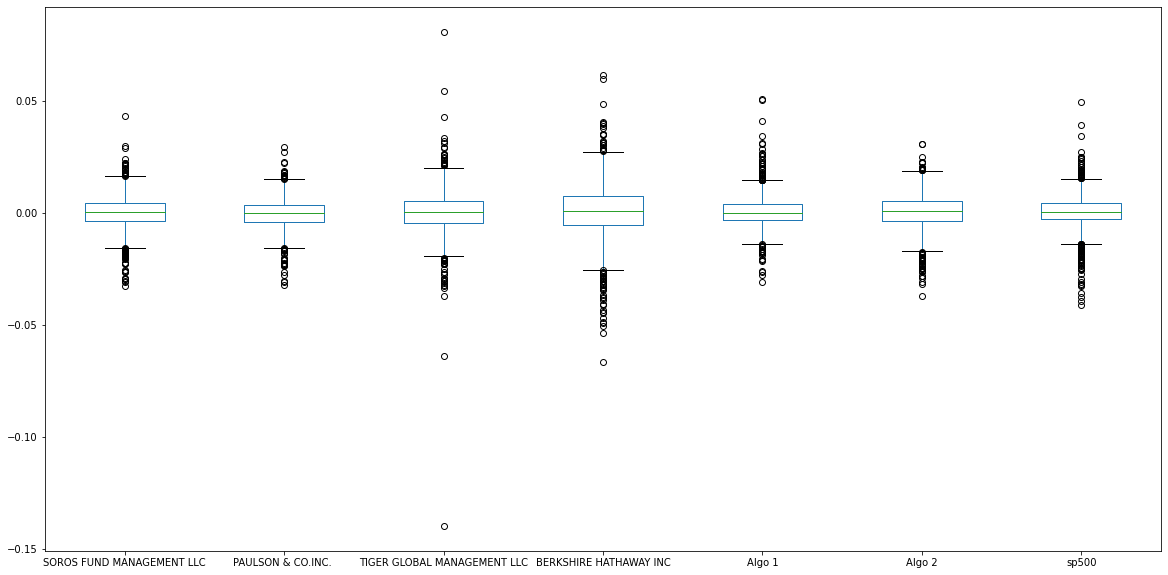

In [18]:
# Box plot to visually illustrate risk
df_daily.plot(kind = "box", figsize = (20, 10))

In [19]:
# Calculate std for each portfolio
df_daily_std = pd.DataFrame(df_daily.std()).rename(columns = {0:"std"})
df_daily_std

,std
SOROS FUND MANAGEMENT LLC,0.007895
PAULSON & CO.INC.,0.007023
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919
Algo 1,0.007620
Algo 2,0.008342
sp500,0.008554


In [20]:
# Determine which portfolio is more risky than sp500
higher_std = df_daily_std[df_daily_std["std"] > df_daily_std.loc["sp500", "std"]]
higher_std

,std
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919


In [21]:
# Calculate annualized std
df_annualized_std = df_daily_std*np.sqrt(252)
df_annualized_std

,std
SOROS FUND MANAGEMENT LLC,0.125335
PAULSON & CO.INC.,0.111488
TIGER GLOBAL MANAGEMENT LLC,0.172936
BERKSHIRE HATHAWAY INC,0.205077
Algo 1,0.120967
Algo 2,0.132430
sp500,0.135786


<AxesSubplot:xlabel='Date'>

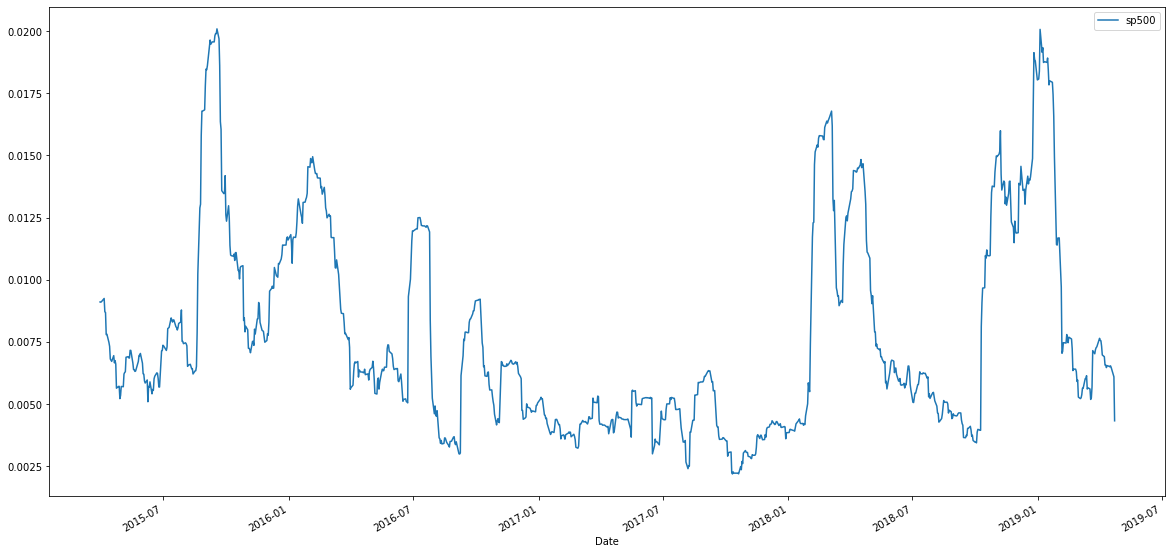

In [22]:
# Calculate and plot rolling std for sp500 for 21 day period
sp500_rolling_21 = df_daily[["sp500"]].rolling(window=21).std()
sp500_rolling_21.plot(figsize = (20, 10))

In [23]:
correlation_sp500 = pd.DataFrame(df_daily.corr()).loc[:, "sp500"]
correlation_sp500 [correlation_sp500==correlation_sp500[correlation_sp500<1].max()]

Algo 2    0.858764
Name: sp500, dtype: float64

<AxesSubplot:xlabel='sp500', ylabel='Algo 2'>

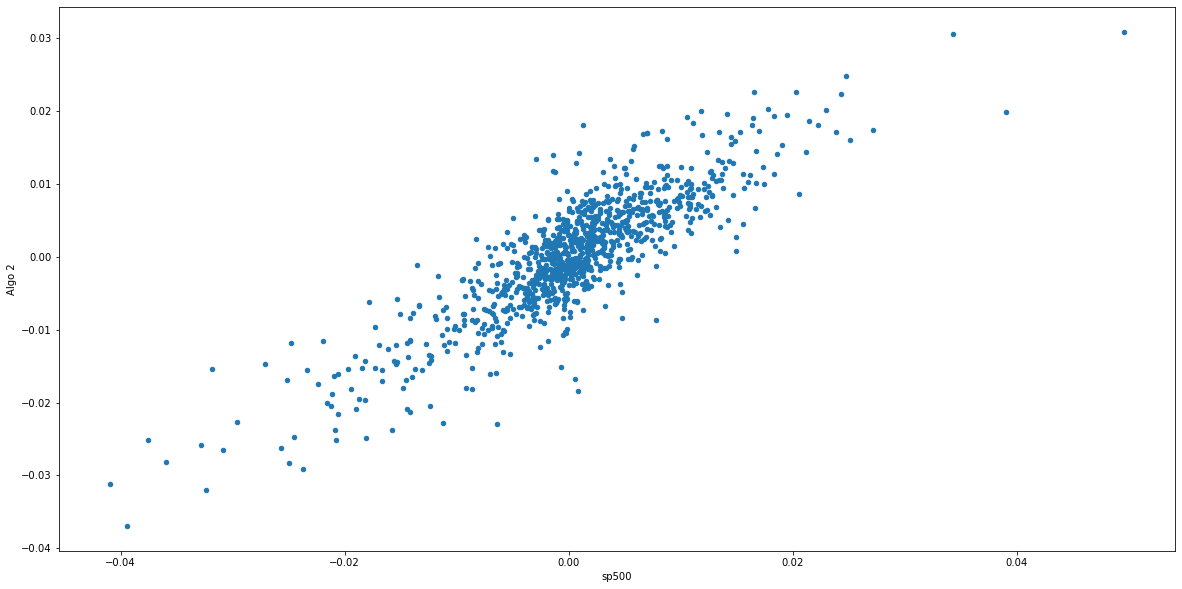

In [24]:
df_daily.plot(kind="scatter", y = "Algo 2", x = "sp500", figsize = (20, 10))

<AxesSubplot:title={'center':'Rolling 60 day beta of BERKSHIRE HATHAWAY'}, xlabel='Date'>

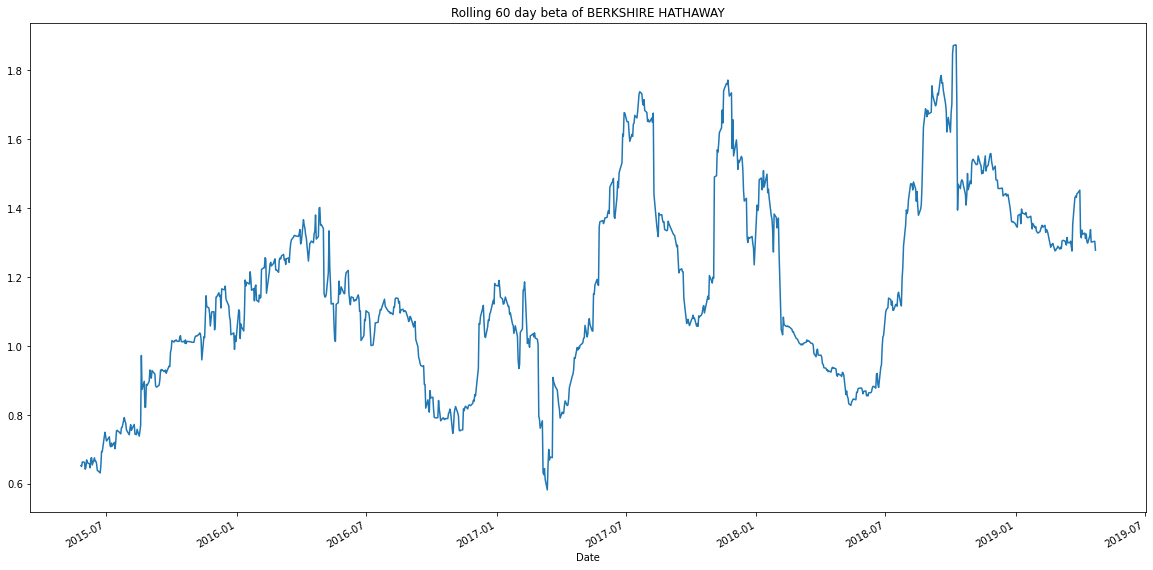

In [25]:
# Calculate Beta for single portfolio compared to sp500
rolling_covariance = df_daily['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(df_daily['sp500'])
rolling_variance = df_daily['sp500'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title = 'Rolling 60 day beta of BERKSHIRE HATHAWAY')

<AxesSubplot:xlabel='Date'>

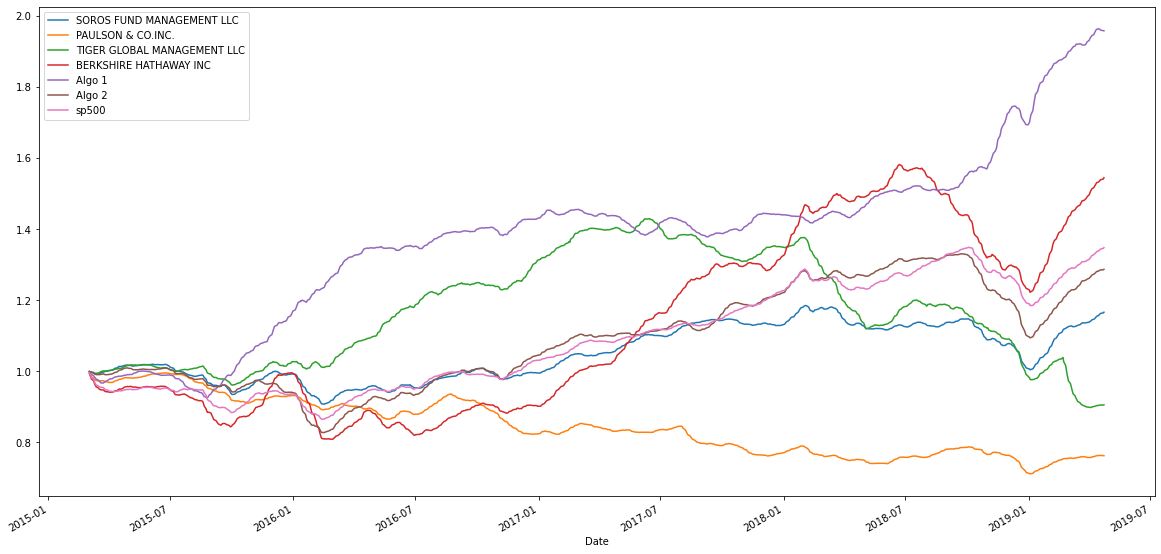

In [26]:
df_daily_ewm = df_daily.ewm(span = 21, adjust=False).mean()
(1 + df_daily_ewm).cumprod().plot(figsize=(20, 10))

In [27]:
# Annualized sharpe ratios
sharpe_ratios = df_daily.mean()*252/(df_daily.std()*np.sqrt(252))

In [28]:
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
sp500                          0.648267
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

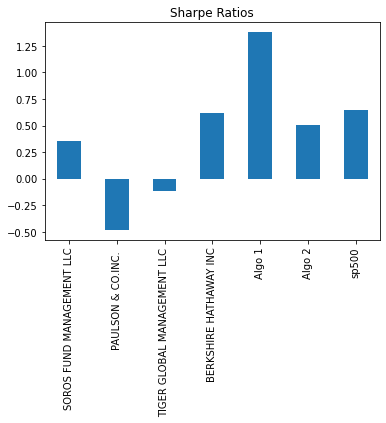

In [29]:
sharpe_ratios.plot(kind = "bar", title = "Sharpe Ratios")

In [30]:
# Read the first stock
msft_history = pd.read_csv(Path("msft_history.csv"), index_col="Date",
                           parse_dates = True, infer_datetime_format= True)
# msft_history.rename(columns = {"Close":"MSFT"}, inplace = True)
msft_history.index = msft_history.index.date
msft_history.columns = ["MSFT"]

msft_history.head()

,MSFT
2018-10-01,115.61
2018-10-02,115.15
2018-10-03,115.17
2018-10-04,112.79
2018-10-05,112.13


In [31]:
# Read the first stock
pypl_history = pd.read_csv(Path("pypl_history.csv"), index_col="Date",
                           parse_dates = True, infer_datetime_format= True)
# pypl_history.rename(columns = {"Close":"pypl"}, inplace = True)
pypl_history.index = pypl_history.index.date
pypl_history.columns = ["PYPL"]

pypl_history.head()

,PYPL
2018-10-01,87.55
2018-10-02,86.68
2018-10-03,87.15
2018-10-04,84.34
2018-10-05,83.18


In [32]:
# Read the first stock
lulu_history = pd.read_csv(Path("lulu_history.csv"), index_col="Date",
                           parse_dates = True, infer_datetime_format= True)
# lulu_history.rename(columns = {"Close":"lulu"}, inplace = True)
lulu_history.index = lulu_history.index.date
lulu_history.columns = ["LULU"]

lulu_history.head()

,LULU
2018-10-01,161.64
2018-10-02,160.20
2018-10-03,161.52
2018-10-04,157.04
2018-10-05,153.84


In [33]:
# Concatenate all data into single frame
my_portfolio = pd.concat((msft_history, pypl_history, lulu_history), axis = 1, join = "inner")
my_portfolio.sort_index(ascending = True, inplace = True)
my_portfolio.head()

,MSFT,PYPL,LULU
2018-10-01,115.61,87.55,161.64
2018-10-02,115.15,86.68,160.20
2018-10-03,115.17,87.15,161.52
2018-10-04,112.79,84.34,157.04
2018-10-05,112.13,83.18,153.84


In [34]:
# Reset Index
# my_portfolio.reset_index()

In [35]:
# Dropping Nulls
my_portfolio.dropna(inplace = True)

In [36]:
# Calculate weighted portfolio
weights = [1/3, 1/3, 1/3]
my_portfolio = my_portfolio.dot(weights)
my_portfolio_returns = my_portfolio.pct_change()
my_portfolio_returns.dropna(inplace = True)
my_portfolio_returns.head()

2018-10-02   -0.007593
2018-10-03    0.005000
2018-10-04   -0.026578
2018-10-05   -0.014174
2018-10-08   -0.019963
dtype: float64

In [37]:
df_daily["my_portfolio"] = my_portfolio_returns
df_daily.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500,my_portfolio
Date,,,,,,,,
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,-0.007228
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.008812
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.005550
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,-0.001114
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841,0.013702


In [38]:
my_portfolio_returns.dropna(inplace=True)
my_portfolio_returns

2018-10-02   -0.007593
2018-10-03    0.005000
2018-10-04   -0.026578
2018-10-05   -0.014174
2018-10-08   -0.019963
                ...   
2021-04-15    0.015997
2021-04-16   -0.005376
2021-04-19   -0.006774
2021-04-20   -0.011709
2021-04-21    0.015698
Length: 642, dtype: float64

<AxesSubplot:xlabel='Date'>

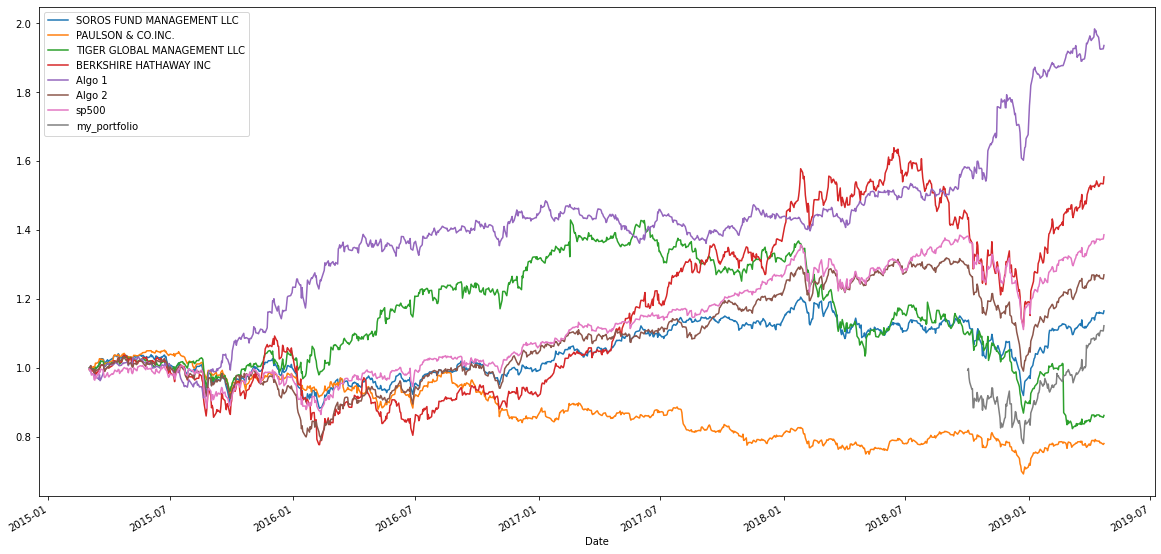

In [39]:
# Plot cumulative returns
df_cum = (1 + df_daily).cumprod()
df_cum.plot(figsize = (20, 10))

In [40]:
# Calculate std for each portfolio
portfolio_std = pd.DataFrame(df_daily.std()).rename(columns = {0:"std"})
portfolio_std

,std
SOROS FUND MANAGEMENT LLC,0.007895
PAULSON & CO.INC.,0.007023
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919
Algo 1,0.007620
Algo 2,0.008342
sp500,0.008554
my_portfolio,0.020046


In [41]:
higher_std = portfolio_std[portfolio_std["std"] > portfolio_std.loc["sp500", "std"]]
higher_std

,std
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919
my_portfolio,0.020046


My portfolio contains the greatest amount of risk

In [42]:
# Assess the risk
# Annualized std
my_portfolio_std = df_daily.mean()*252/(df_daily.std()*np.sqrt(252))
my_portfolio_std

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
sp500                          0.648267
my_portfolio                   0.811758
dtype: float64

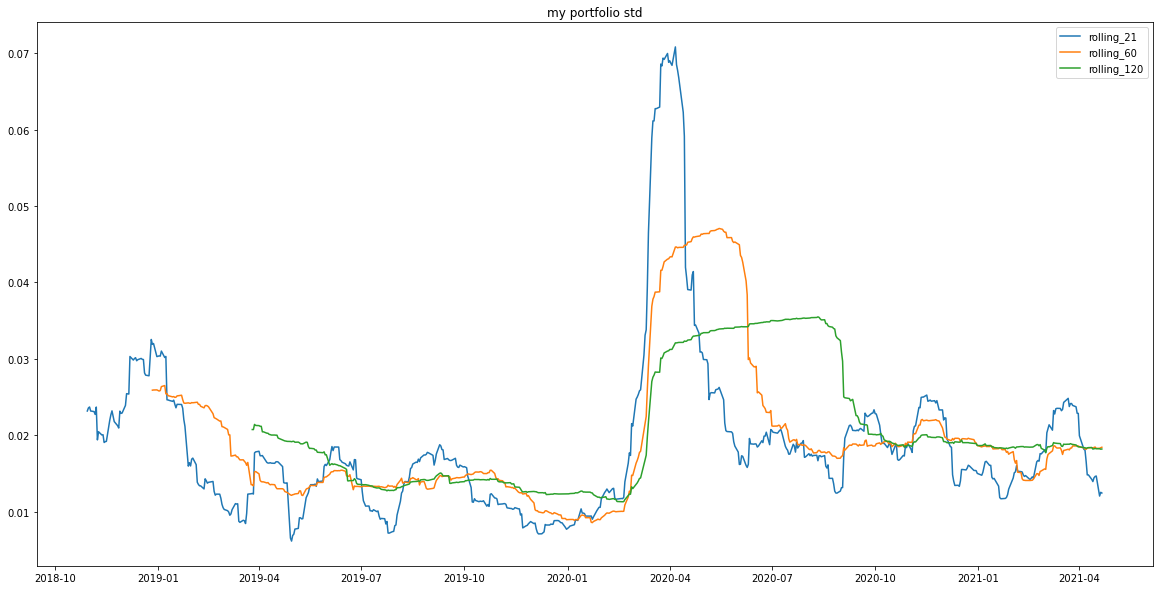

In [43]:
# Rolling Calculations
my_portfolio_rolling_21 = my_portfolio_returns.rolling(window = 21).std()
my_portfolio_rolling_60 = my_portfolio_returns.rolling(window = 60).std()
my_portfolio_rolling_120 = my_portfolio_returns.rolling(window = 120).std()
ax = my_portfolio_rolling_21.plot(figsize = (20, 10), title = 'my portfolio std')
my_portfolio_rolling_60.plot(ax = ax)
my_portfolio_rolling_120.plot(ax = ax)
ax.legend(['rolling_21', 'rolling_60', 'rolling_120'])

In [44]:
correlation_my_portfolio = pd.DataFrame(df_daily.corr()).loc[:, "my_portfolio"]
correlation_my_portfolio[correlation_my_portfolio==correlation_my_portfolio[correlation_my_portfolio<1].max()]

sp500    0.825455
Name: my_portfolio, dtype: float64

<AxesSubplot:xlabel='my_portfolio', ylabel='sp500'>

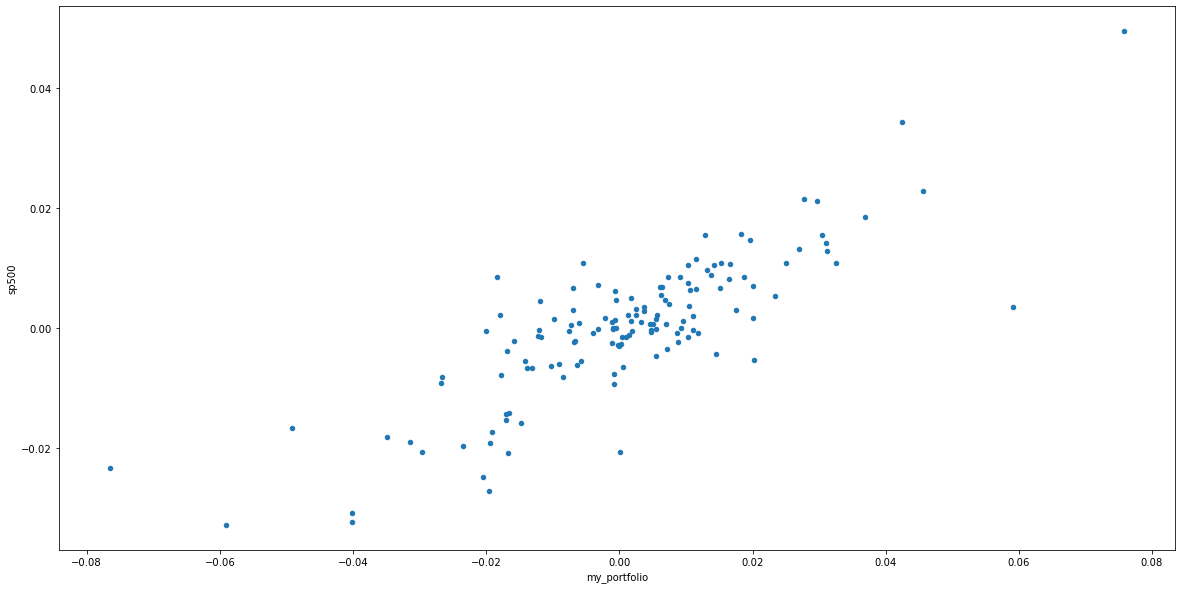

In [45]:
df_daily.plot(kind="scatter", y = "sp500", x = "my_portfolio", figsize = (20, 10))

My portfolio is highly correlated with the S&P 500

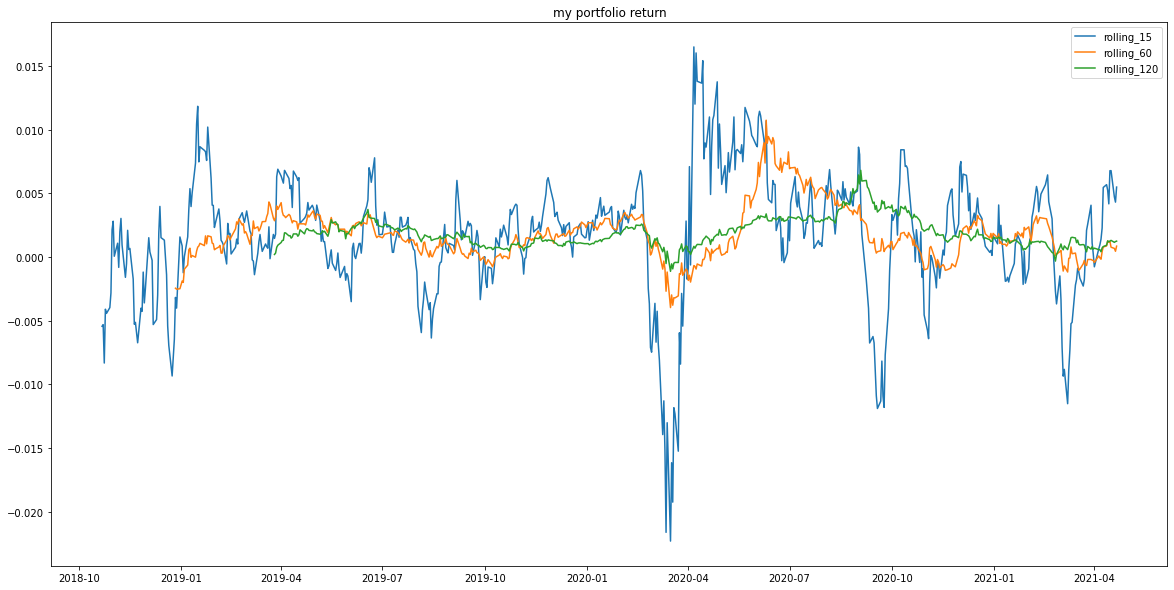

In [46]:
my_portfolio_rolling_15 = my_portfolio_returns.rolling(window = 15).mean()
my_portfolio_rolling_60 = my_portfolio_returns.rolling(window = 60).mean()
my_portfolio_rolling_120 = my_portfolio_returns.rolling(window = 120).mean()
ax = my_portfolio_rolling_15.plot(figsize = (20, 10), title = 'my portfolio return')
my_portfolio_rolling_60.plot(ax = ax)
my_portfolio_rolling_120.plot(ax = ax)
ax.legend(['rolling_15', 'rolling_60', 'rolling_120'])

<AxesSubplot:title={'center':'Rolling 60 day beta of my portfolio'}, xlabel='Date'>

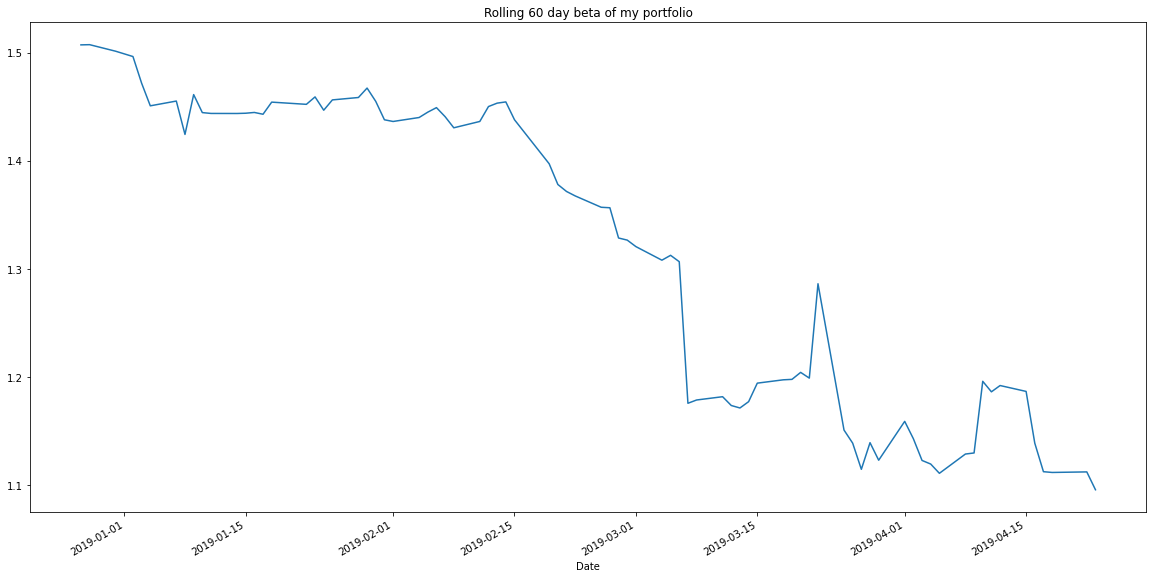

In [47]:
# Calculate Beta
rolling_covariance = df_daily['my_portfolio'].rolling(window=60).cov(df_daily['sp500'])
rolling_variance = df_daily['sp500'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title = 'Rolling 60 day beta of my portfolio')

In [48]:
# Assess the risk
# Annualized sharpe ratios
sharpe_ratios = df_daily.mean()*252/(df_daily.std()*np.sqrt(252))

<AxesSubplot:title={'center':'Sharpe Ratios'}>

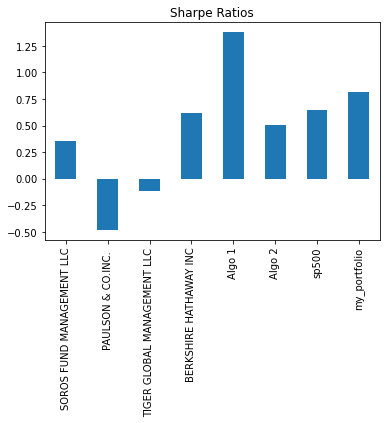

In [49]:
# Visual Illustration of sharpe ratios
sharpe_ratios.plot(kind = "bar", title = "Sharpe Ratios")

As indicated in the bar plot above, my portfolio has the second highest sharpe ratio. While my portfolio's sharpe ratio is higher than the S&P 500, the difference is only slight. My portfolio's annualized standard deviation is fairly high compared to the other portfolios, and so there's quite a bit of volatility. Notably, my portfolio's beta has steadily decreased over time, which indicates the stock has become less volatile. So while my portfolio's annualized standard deviation is higher compared to the other portfolios, it's important to note that the decline in the portfolio's beta value indicates less volatility in relation to the S&P 500. 